<a href="https://colab.research.google.com/github/gnbhub/gnb_2022_1_Ai_team3/blob/master/DooHyunLee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
(891, 12) (418, 11) (418, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


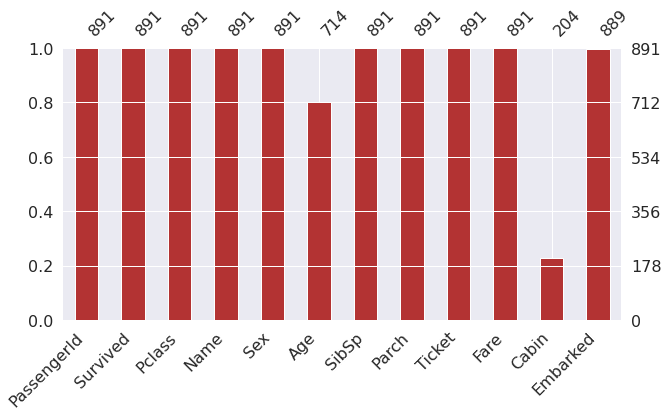

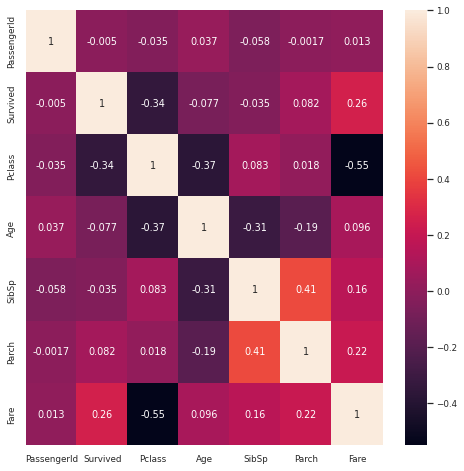

(1309, 13)


In [4]:
from google.colab import drive
drive.mount('/gdrive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive_path="/content/"

train=pd.read_csv(drive_path+"train.csv")
test=pd.read_csv(drive_path+"test.csv")
submission=pd.read_csv(drive_path+"submission.csv")

print(train.shape,test.shape,submission.shape)

train.head(3)
test.head(2)
submission.head()

train.info()
train.describe(include='all')
import missingno as msno
msno.bar(train,figsize=(10,5),color=(0.7,0.2,0.2))
plt.show()

plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(),annot=True,cbar=True);
plt.show()

train['TrainSplit']='Train'
test['TrainSplit']='Test'
data=pd.concat([train,test],axis=0)
print(data.shape)

In [10]:
data_num=data.loc[:,['Pclass','Age','SibSp','Parch','Fare','Survived']]
data_num['Age']=data_num['Age'].fillna(data_num['Age'].mean())
data_num['Fare']=data_num['Fare'].fillna(data_num['Fare'].mode()[0])

selected_features=['Pclass','Age','SibSp','Parch','Fare']

X_train=data_num.loc[data['TrainSplit']=='Train',selected_features]
y_train=data_num.loc[data['TrainSplit']=='Train','Survived']

X_test=data_num.loc[data['TrainSplit']=='Test',selected_features]

print("Train 데이터셋 크기:",X_train.shape,y_train.shape)
print("Test 데이터셋 크기:",X_test.shape)

Train 데이터셋 크기: (891, 5) (891,)
Test 데이터셋 크기: (418, 5)


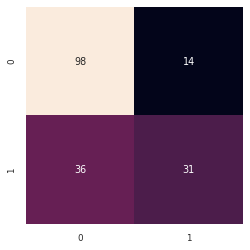

In [11]:
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val=train_test_split(X_train, y_train, test_size=0.2,shuffle=True,random_state=20)

from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_tr,y_tr)
y_val_pred=lr_model.predict(X_val)

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val,y_val_pred),annot=True,cbar=False,square=True)
plt.show()

In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score,roc_auc_score
print("Accuracy:%.4f"%accuracy_score(y_val,y_val_pred))
print("Precision:%.4f"%precision_score(y_val,y_val_pred))
print("Recall:%.4f"%recall_score(y_val,y_val_pred))
print("F1:%.4f"%f1_score(y_val,y_val_pred))
print("AUC:%.4f"%roc_auc_score(y_val,y_val_pred))

y_test_pred=lr_model.predict(X_test)
submission['Survived']=y_test_pred.astype(int)
submission_filepath=drive_path+'baseline_num_lr_submission_001.csv'
submission.to_csv(submission_filepath,index=False)
submission.head(5)

Accuracy:0.7207
Precision:0.6889
Recall:0.4627
F1:0.5536
AUC:0.6688


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


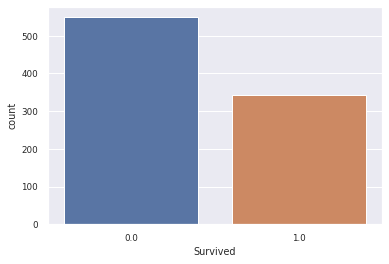

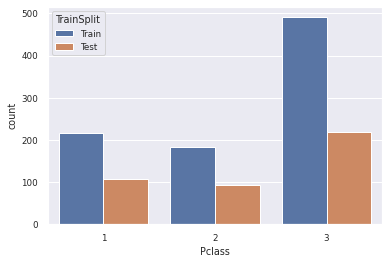

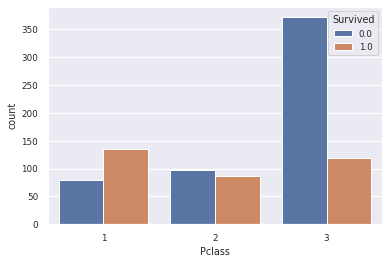

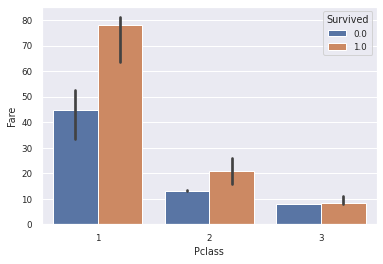

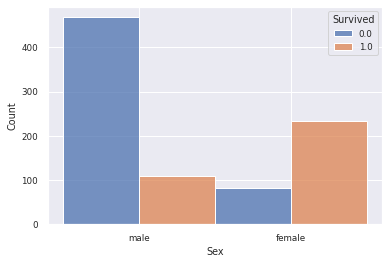

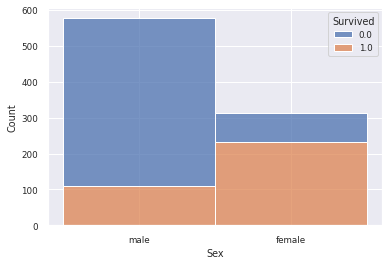

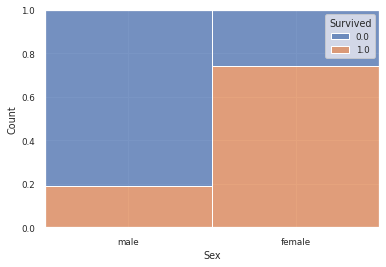

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: Title, dtype: int64

In [15]:
train['Survived'].value_counts(dropna=False)
sns.countplot(x='Survived',data=data[data['TrainSplit']=='Train'])
plt.show()

sns.countplot(x='Pclass',hue='TrainSplit',data=data)
plt.show()

sns.countplot(x='Pclass',hue='Survived',data=data[data['TrainSplit']=='Train'])
plt.show()

sns.barplot(x='Pclass',y='Fare',hue='Survived',data=data[data['TrainSplit']=='Train'],estimator=np.median)
plt.show()

sns.histplot(x='Sex',hue='Survived',multiple='dodge',data=data[data['TrainSplit']=='Train'])
plt.show()

sns.histplot(x='Sex',hue='Survived',multiple='stack',data=data[data['TrainSplit']=='Train'])
plt.show()
sns.histplot(x='Sex',hue='Survived',multiple='fill',data=data[data['TrainSplit']=='Train'])
plt.show()

#[25]
data['Name'].unique()

title_name=data['Name'].str.split(",",expand=True)[1]
title_name
title=title_name.str.split(".",expand=True)[0]
title.value_counts(dropna=False)

#[28]
title=title.replace(['Ms'],'Miss')
title=title.replace(['Mile','the Countess','Lady','Don','Dona','Mme','Sir','Jonkheer'],'Nobel')
title=title.replace(['Col','Major','Capt'],'Officer')
title=title.replace(['Dr','Rev'],'Priest')
data['Title']=np.array(title)
data['Title'].value_counts(dropna=False)


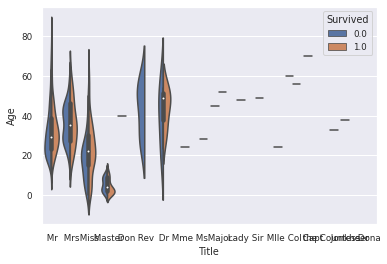

KeyError: ignored

In [19]:
#29
sns.violinplot(x='Title',y='Age',hue='Survived',data=data,split=True)
plt.show()

#30
data=data.drop('Name',axis=1)
data.columns





In [21]:
#31
for title in data['Title'].unique():
  print("%s 결측값 개수:"%title.data.loc[data['Title']==title,'Age'].isnull().sum())
  age_med=data.loc[data['Title']==title,'Age'].median()
  data.loc[data['TItle']==title,'Age']=data.loc[data['Title']==title,'Age'].fillna(age_med)

print('\n')
print("Age 열의 결측값 개수:",data['Age'].isnull().sum())


AttributeError: ignored

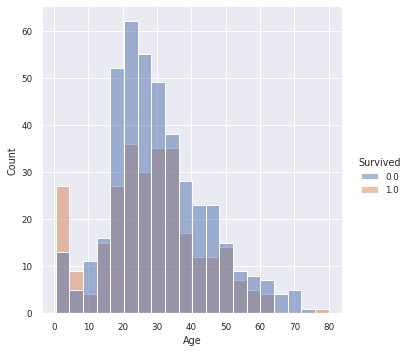

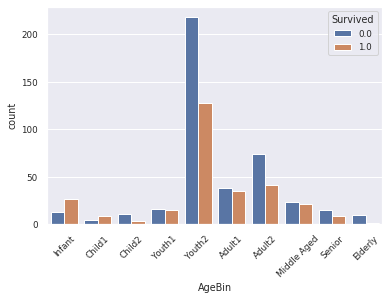

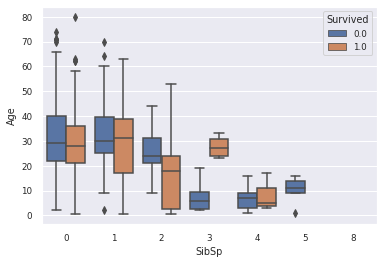

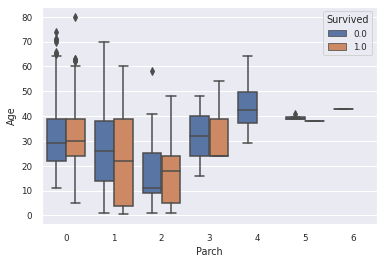

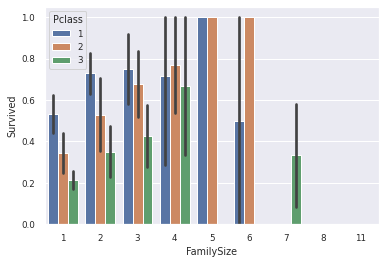

13.302888700564967


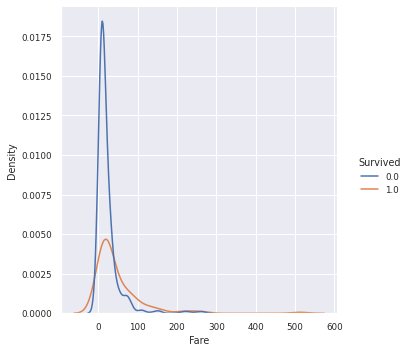

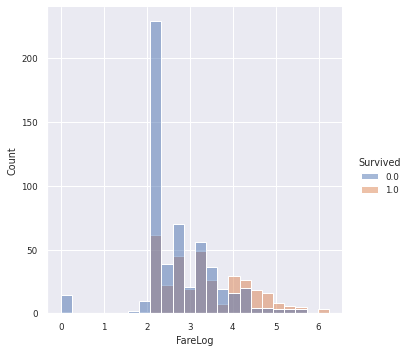

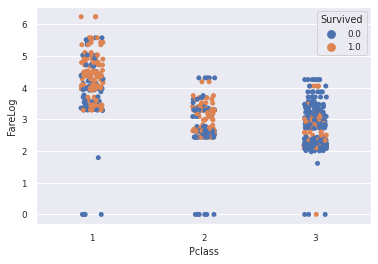

Embarked 열의 최빈값: S


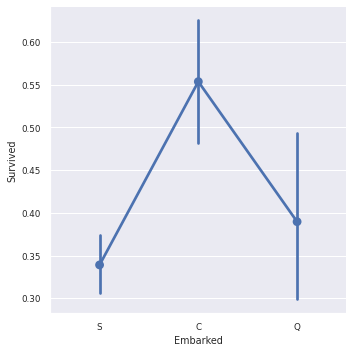

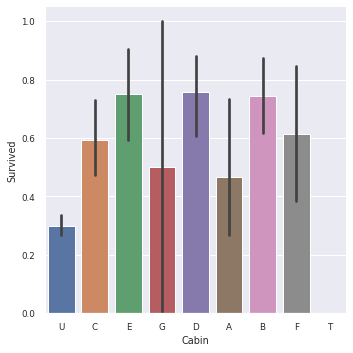

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


PC         92
CA         68
A5         28
SOTONOQ    24
WC         15
           ..
239854      1
4134        1
11771       1
65304       1
359309      1
Name: Ticket, Length: 741, dtype: int64

In [25]:
#32
sns.displot(x='Age',kind='hist',hue='Survived',data=data[data['TrainSplit']=='Train'])
plt.show()

#33
bins=[0,4,8,12,16,32,36,48,56,64,100]
labels=['Infant','Child1','Child2','Youth1','Youth2','Adult1','Adult2','Middle Aged','Senior','Elderly']
data['AgeBin']=pd.cut(data['Age'],bins=bins,labels=labels)

sns.countplot(x='AgeBin',hue='Survived',data=data[data['TrainSplit']=='Train'])
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='SibSp',y='Age',hue='Survived',data=data[data['TrainSplit']=='Train'])
plt.show()

#35
sns.boxplot(x='Parch',y='Age',hue='Survived',data=data[data['TrainSplit']=='Train'])
plt.show()

#36
data['FamilySize']=data['SibSp']+data['Parch']+1
sns.barplot(x='FamilySize',y='Survived',hue='Pclass',estimator=np.mean,data=data[data['TrainSplit']=='Train'])
plt.show()

#37
data.loc[data['Fare'].isnull(),:]

p3_fare_mean=data.loc[data['Pclass']==3,'Fare'].mean()
print(p3_fare_mean)
data['Fare']=data['Fare'].fillna(p3_fare_mean)
data.loc[data['PassengerId']==1044,:'Fare']

#39
sns.displot(x='Fare',kind='kde',hue='Survived',data=data[data['TrainSplit']=='Train'])
plt.show()

#40
data['FareLog']=np.log1p(data['Fare'])
sns.displot(x='FareLog',kind='hist',hue='Survived',data=data[data['TrainSplit']=='Train'])
plt.show()

#41
sns.stripplot(x='Pclass',y='FareLog',hue='Survived',data=data[data['TrainSplit']=='Train'])
plt.show()

#42
data.loc[data['Embarked'].isnull(),:]

#43
print('Embarked 열의 최빈값:',data['Embarked'].mode()[0])
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Embarked'].value_counts(dropna=False)

#44
sns.catplot(x='Embarked',y='Survived',kind='point',data=data[data['TrainSplit']=='Train'])
plt.show()

#45
data['Cabin'].unique()

#46
data['Cabin'].str.slice(0,1).value_counts(dropna=False)

#47
data['Cabin']=data['Cabin'].str.slice(0,1)
data['Cabin']=data['Cabin'].fillna('U')

sns.catplot(x='Cabin',y='Survived',kind='bar',data=data[data['TrainSplit']=='Train'])
plt.show()

#48
data['Ticket'].value_counts(dropna=False)

data['Ticket']=data['Ticket'].str.replace(".","").str.replace("/","")
data['Ticket']=data['Ticket'].str.strip().str.split(' ').str[0]
data['Ticket'].value_counts(dropna=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


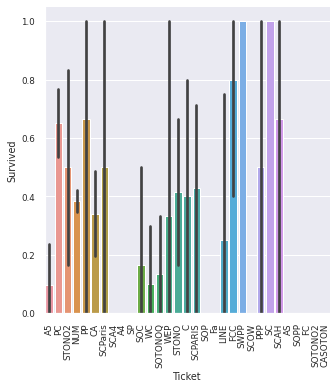

In [27]:
#49
data['Ticket']=data['Ticket'].str.replace(".","").str.replace("/","")
data['Ticket']=data['Ticket'].str.strip().str.split(' ').str[0]
data['Ticket'].value_counts(dropna=False)

#50
data.loc[data['Ticket'].str.isdigit(),'Ticket']='NUM'
data['Ticket'].value_counts(dropna=False)[:10]

sns.catplot(x='Ticket',y='Survived',kind='bar',data=data[data['TrainSplit']=='Train'])
plt.xticks(rotation=90)
plt.show()

In [33]:
#51
from sklearn.preprocessing import LabelEncoder
for col in ['Title','AgeBin']:
   encoder=LabelEncoder()
   data[col]=encoder.fit_transform(data[col])

data.loc[:,['Title','AgeBin']].head()



,Title,AgeBin
0,12,9
1,13,1
2,9,9
3,13,0
4,12,0
